# Analysis of Highest Crime Area in London

From this big dataset I am wanting to do some data cleaning. With that I am also wanting too observe some policing and crime trends that are going on in the high crime areas of London. I would like to do this by observing crime and searches in different parts of the city and also observe the results from these interactions. With this it might also be important to know the demographic of the population that is being searched and look for some other trends that the dataset can provide.

# Table of Contents

* **[Cleaning Street Data](#Cleaning-Street-Data)**
* **[Cleaning Search Data](#Cleaning-Search-Data)**
* **[Cleaning Outcomes Data](#Cleaning-Outcomes-Data)**
* **[Joining the Datasets](#Joining-the-Datasets)**
* **[Analysis of Westminster Crime](#Analysis-of-Westminster-Crime)**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-police-records/london-street.csv
/kaggle/input/london-police-records/london-stop-and-search.csv
/kaggle/input/london-police-records/london-outcomes.csv


In [2]:
#Load in the datasets
street = pd.read_csv("/kaggle/input/london-police-records/london-street.csv")
search = pd.read_csv("/kaggle/input/london-police-records/london-stop-and-search.csv")
outcomes = pd.read_csv("/kaggle/input/london-police-records/london-outcomes.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning Street Data

In [3]:
#Get look at the dataset
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
4,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


In [4]:
street.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946479 entries, 0 to 2946478
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 269.8+ MB


In [5]:
#Find proportion of missing data in street dataset
street.isnull().sum()/len(street)

Crime ID                 0.240376
Month                    0.000000
Reported by              0.000000
Falls within             0.000000
Longitude                0.011769
Latitude                 0.011769
Location                 0.000000
LSOA code                0.011769
LSOA name                0.011769
Crime type               0.000000
Last outcome category    0.240376
Context                  1.000000
dtype: float64

In [6]:
#Drop Context Column from dataset
new_street = street.drop(columns=['Context'])

In [7]:
#Checking dataset too see if we need too keep Crime ID column
search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [8]:
#Checking dataset too see if any matches for Crime ID column
outcomes.info() #It looks like later we might be able to join datasets on Crime ID so we will leave it alone for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947050 entries, 0 to 1947049
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Crime ID      object 
 1   Month         object 
 2   Reported by   object 
 3   Falls within  object 
 4   Longitude     float64
 5   Latitude      float64
 6   Location      object 
 7   LSOA code     object 
 8   LSOA name     object 
 9   Outcome type  object 
dtypes: float64(2), object(8)
memory usage: 148.5+ MB


In [9]:
#Quick look at Longitude
new_street.Longitude.describe()

count    2.911801e+06
mean    -1.207649e-01
std      1.488718e-01
min     -5.668404e+00
25%     -2.025260e-01
50%     -1.138210e-01
75%     -3.323900e-02
max      1.751738e+00
Name: Longitude, dtype: float64

Now working with this data and having context we would not find this information valuable if we do not have all the info on the loaction of the event and for that reason we are going to drop all missing values from columns.

In [10]:
#Make new dataframe for dropped nan dataset
new_street1 = new_street.dropna()

In [11]:
#Do we have any missing values?
new_street1.isnull().sum()

Crime ID                 0
Month                    0
Reported by              0
Falls within             0
Longitude                0
Latitude                 0
Location                 0
LSOA code                0
LSOA name                0
Crime type               0
Last outcome category    0
dtype: int64

In [12]:
#Now lets take a look at the dataset
new_street1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect
8,92be9a7d4c6c076cf245d15ca162d675ec65139ad5fabe...,2014-06,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified
9,d37709a832130d3cfe650daa327b700968b3d1b3620622...,2014-06,City of London Police,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified
10,6ccf322a44296c494627bfcf687b876841b1012bb08691...,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified


In [13]:
#Want too change Month column to string so I can slice the year
new_street1['Month'] = new_street1['Month'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Make new columns for year and month separately
new_street1['Year'] = new_street1.Month.str[0:4]
new_street1['month'] = new_street1.Month.str[6:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#Year and month column have now been created
new_street1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,month
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,2014,6
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,2014,6
8,92be9a7d4c6c076cf245d15ca162d675ec65139ad5fabe...,2014-06,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,2014,6
9,d37709a832130d3cfe650daa327b700968b3d1b3620622...,2014-06,City of London Police,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,2014,6
10,6ccf322a44296c494627bfcf687b876841b1012bb08691...,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,2014,6


In [16]:
#Import package for plotting
import seaborn as sns

<AxesSubplot:xlabel='Reported by', ylabel='count'>

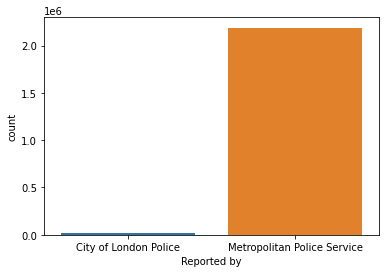

In [17]:
#Count plot to show frequency of unique values in Reported by column
sns.countplot(x='Reported by', data=new_street1)

The count plot shows interesting data. It can be see that there are only two places that report London Crime. What I am interested in is if 'Reported by' and 'Falls within' are going to be very similar in their results.

<AxesSubplot:xlabel='Falls within', ylabel='count'>

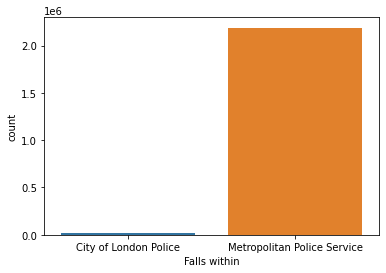

In [18]:
#Count plot to show frequency of unique values in Falls within by column
sns.countplot(x='Falls within', data=new_street1)

We have a very similar graph so I want to go in and check the actual value counts for each column

In [19]:
#Value count for Reported by
new_street1['Reported by'].value_counts()

Metropolitan Police Service    2188554
City of London Police            15358
Name: Reported by, dtype: int64

In [20]:
#Value count for Falls within
new_street1['Falls within'].value_counts()

Metropolitan Police Service    2188554
City of London Police            15358
Name: Falls within, dtype: int64

From the results it can be shown that there was not a whole lot of value in making two separate columns when these columns show the exact same data. It is possible that randomly the numbers add up and the columns are not the same for every entry, but the odds of that are incredibly low given we have an exact match for over 232,000 entries.

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

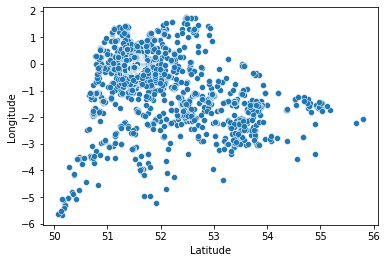

In [21]:
#Quick sketch of Latitude and Longitude columns for entries
sns.scatterplot(x="Latitude", y="Longitude", data=new_street1)

In [22]:
#Find value_count of Location column
new_street1['Location'].value_counts()

On or near Supermarket             98057
On or near Shopping Area           62376
On or near Petrol Station          59273
On or near Parking Area            59244
On or near Nightclub               35202
                                   ...  
On or near Grimsby Close               1
On or near Barleylands Road            1
On or near Starkie Street              1
On or near Mindelheim Avenue           1
On or near Spring Garden Street        1
Name: Location, Length: 36352, dtype: int64

The Location column is very interesting. Out of our 230,000+ entries we have over 36,000 locations that were recorded. For each entry there can only be one location so it will be interesting too see how this columns fits with analyzing the datasets later.

In [23]:
#LSOA name and LSOA code have same information
new_street1['LSOA name'].value_counts()

Westminster 013E                     15970
Westminster 018A                     13232
Westminster 013B                     11487
City of London 001F                  10718
Westminster 018C                      8259
                                     ...  
Medway 003D                              1
Broadland 015A                           1
King's Lynn and West Norfolk 004C        1
Portsmouth 001A                          1
Richmondshire 004E                       1
Name: LSOA name, Length: 6907, dtype: int64

Like our Locations column this might not give us a lot of information. However, we may be able to get more information out of this if we make a new column negating the code identifcation at the end of the LSOA name.

In [24]:
#Want too change LSOA name column to string so I can slice end of it off
new_street1['LSOA name'] = new_street1['LSOA name'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
new_street1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,month
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,2014,6
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,2014,6
8,92be9a7d4c6c076cf245d15ca162d675ec65139ad5fabe...,2014-06,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,2014,6
9,d37709a832130d3cfe650daa327b700968b3d1b3620622...,2014-06,City of London Police,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,2014,6
10,6ccf322a44296c494627bfcf687b876841b1012bb08691...,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,2014,6


In [26]:
new_street1['LSOA_Region'] = new_street1['LSOA name'].str[:-4]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
new_street1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,month,LSOA_Region
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,2014,6,Camden
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,2014,6,Camden
8,92be9a7d4c6c076cf245d15ca162d675ec65139ad5fabe...,2014-06,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,2014,6,City of London
9,d37709a832130d3cfe650daa327b700968b3d1b3620622...,2014-06,City of London Police,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,2014,6,City of London
10,6ccf322a44296c494627bfcf687b876841b1012bb08691...,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,2014,6,City of London


In [28]:
#Now we will look at new LSOA region
new_street1['LSOA_Region'].value_counts()

Westminster         146901
Lambeth             100443
Southwark            92588
Newham               89084
Camden               87449
                     ...  
Carmarthenshire          1
Lincoln                  1
Warrington               1
Denbighshire             1
Burnley                  1
Name: LSOA_Region, Length: 312, dtype: int64

We are able to see that we have 312 different section that are have entries in the dataset.

In [29]:
#Frequency of unique values in Crime type column
new_street1['Crime type'].value_counts()

Violence and sexual offences    584602
Other theft                     329281
Vehicle crime                   260235
Burglary                        211926
Criminal damage and arson       183108
Shoplifting                     134777
Public order                    128034
Theft from the person           106704
Drugs                           103542
Robbery                          67641
Bicycle theft                    53889
Other crime                      27532
Possession of weapons            12641
Name: Crime type, dtype: int64

We have 13 different types of crime that were reported in the dataset.

In [30]:
#Frequency of unique values in Last outcome category column
new_street1['Last outcome category'].value_counts()

Investigation complete; no suspect identified          1068494
Status update unavailable                               616948
Under investigation                                     163653
Offender given a caution                                 62570
Court result unavailable                                 48733
Offender given a drugs possession warning                37798
Defendant found not guilty                               28052
Awaiting court outcome                                   27463
Offender sent to prison                                  27375
Offender given community sentence                        23325
Local resolution                                         20308
Offender fined                                           19555
Offender given penalty notice                            18460
Offender given suspended prison sentence                 13200
Offender given conditional discharge                     11432
Court case unable to proceed                           

We have quite a few outcome category results. Not sure what I want done to this column yet. May come back to it later in the data cleaning process.

# Cleaning Search Data

In [31]:
#Moving on to cleaning the search dataset
search.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [32]:
#Basic info of search dataset
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302623 entries, 0 to 302622
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Type                                      302623 non-null  object 
 1   Date                                      302623 non-null  object 
 2   Part of a policing operation              120808 non-null  object 
 3   Policing operation                        0 non-null       float64
 4   Latitude                                  110615 non-null  float64
 5   Longitude                                 110615 non-null  float64
 6   Gender                                    299453 non-null  object 
 7   Age range                                 288579 non-null  object 
 8   Self-defined ethnicity                    299848 non-null  object 
 9   Officer-defined ethnicity                 298958 non-null  object 
 10  Legislation         

In [33]:
#Find proportion of missing data in search dataset
search.isnull().sum()/len(search)

Type                                        0.000000
Date                                        0.000000
Part of a policing operation                0.600797
Policing operation                          1.000000
Latitude                                    0.634479
Longitude                                   0.634479
Gender                                      0.010475
Age range                                   0.046408
Self-defined ethnicity                      0.009170
Officer-defined ethnicity                   0.012111
Legislation                                 0.000000
Object of search                            0.285725
Outcome                                     0.000000
Outcome linked to object of search          0.996015
Removal of more than just outer clothing    0.990784
dtype: float64

In [34]:
#Drop Columns with Over 70% of Missing Values
new_search = search.drop(columns=['Policing operation', 'Outcome linked to object of search', 'Removal of more than just outer clothing'])

In [35]:
#Check out new dataset
new_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302623 entries, 0 to 302622
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Type                          302623 non-null  object 
 1   Date                          302623 non-null  object 
 2   Part of a policing operation  120808 non-null  object 
 3   Latitude                      110615 non-null  float64
 4   Longitude                     110615 non-null  float64
 5   Gender                        299453 non-null  object 
 6   Age range                     288579 non-null  object 
 7   Self-defined ethnicity        299848 non-null  object 
 8   Officer-defined ethnicity     298958 non-null  object 
 9   Legislation                   302623 non-null  object 
 10  Object of search              216156 non-null  object 
 11  Outcome                       302623 non-null  object 
dtypes: float64(2), object(10)
memory usage: 27.7

Seeing that the rest of the columns are all object besides the Latitude and Longitude columns we are not going to fill these in. We especially do not want to manipulate the data considering these are not factor variables.

In [36]:
#Have dataset with no null values
new_search1 = new_search.dropna()

In [37]:
#Verify we have no null values in new dataset
new_search1.isnull().sum()

Type                            0
Date                            0
Part of a policing operation    0
Latitude                        0
Longitude                       0
Gender                          0
Age range                       0
Self-defined ethnicity          0
Officer-defined ethnicity       0
Legislation                     0
Object of search                0
Outcome                         0
dtype: int64

In [38]:
#See what the new dataset looks like
new_search1.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome
181815,Person search,2016-05-31T23:01:00+00:00,False,51.455989,-0.043536,Male,10-17,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action
181817,Person search,2016-05-31T23:07:00+00:00,False,51.533030,-0.203277,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action
181818,Person search,2016-05-31T23:10:00+00:00,False,51.553184,-0.176043,Male,18-24,Not Stated (NS),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action
181819,Person search,2016-05-31T23:10:00+00:00,False,51.553184,-0.176043,Female,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action
181820,Person search,2016-05-31T23:12:00+00:00,False,51.533658,-0.200210,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action


Now I want to go through each column and do a little more research.

In [39]:
#Find the amount of unique values in the Type column
new_search.Type.unique()

array(['Person search', 'Person and Vehicle search', 'Vehicle search'],
      dtype=object)

<AxesSubplot:xlabel='Type', ylabel='count'>

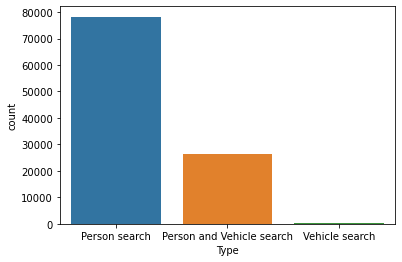

In [40]:
#Count plot to show frequency of unique values in Type column
sns.countplot(x='Type', data=new_search1)

From the graph it looks like that searches were almost always done of a person.

In [41]:
#Value count for Type
new_search1['Type'].value_counts()

Person search                78246
Person and Vehicle search    26396
Vehicle search                 250
Name: Type, dtype: int64

For the date column it is in an interesting format. Like with the street data I want to take out certain parts of the column and store into a new column. From the date I would like to pull out the month, year, and hour.

In [42]:
#Want too change Date column to string so I can slice
new_search1['Date'] = new_search1['Date'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
#Make new columns for year, month and hours separately
new_search1['Year'] = new_search1.Date.str[0:4]
new_search1['month'] = new_search1.Date.str[5:7]
new_search1['Hour'] = new_search1.Date.str[11:13]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [44]:
#Look at new columns
new_search1.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Year,month,Hour
181815,Person search,2016-05-31T23:01:00+00:00,False,51.455989,-0.043536,Male,10-17,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,2016,05,23
181817,Person search,2016-05-31T23:07:00+00:00,False,51.533030,-0.203277,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23
181818,Person search,2016-05-31T23:10:00+00:00,False,51.553184,-0.176043,Male,18-24,Not Stated (NS),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23
181819,Person search,2016-05-31T23:10:00+00:00,False,51.553184,-0.176043,Female,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23
181820,Person search,2016-05-31T23:12:00+00:00,False,51.533658,-0.200210,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23


In [45]:
#Verify no errors in column creation
new_search1.Year.value_counts()

2016    68626
2017    36266
Name: Year, dtype: int64

In [46]:
new_search1.month.value_counts()

10    11239
07    10438
08    10210
09     9868
01     9834
03     9512
11     9461
06     9154
02     8583
04     8337
12     8244
05       12
Name: month, dtype: int64

In [47]:
new_search1.Hour.value_counts()

16    8563
15    8503
17    7007
14    6894
20    6515
23    5913
19    5838
18    5821
13    5818
22    5781
21    5767
12    5084
00    5058
11    4166
01    3970
10    3106
02    2690
09    2112
03    1966
08    1292
04    1169
07     830
05     591
06     438
Name: Hour, dtype: int64

This information will be useful for seeing trends for not only dates, but now times as well.

In [48]:
#Take a look at Age range column
new_search1['Age range'].value_counts()

18-24       42288
25-34       24416
10-17       20699
over 34     17463
under 10       26
Name: Age range, dtype: int64

<AxesSubplot:xlabel='Age range', ylabel='count'>

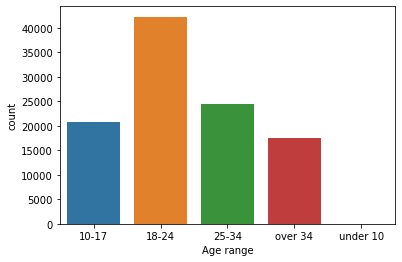

In [49]:
#Do countplot of Age range for faster understanding
sns.countplot(x='Age range', data=new_search1)

From the data it looks like most of the searches in London were for teens and young adults. It also looks like their might be one or two searches that were done for people under the age of 10.

<AxesSubplot:xlabel='Officer-defined ethnicity', ylabel='count'>

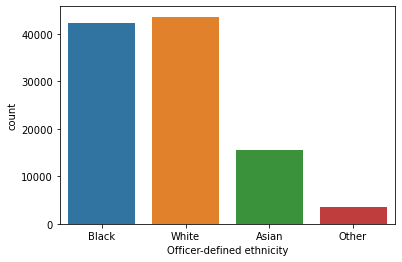

In [50]:
#Countplot for ethnicity
sns.countplot(x="Officer-defined ethnicity", data=new_search1)

The data shows that among those searched a large majority were either Black or White Officer-defined ethincity.

In [51]:
#Check out object of search column
new_search1['Object of search'].value_counts()

Controlled drugs                       66062
Articles for use in criminal damage    37403
Firearms                                1149
Anything to threaten or harm anyone      278
Name: Object of search, dtype: int64

It looks like a large majority of searches were for either drugs or articles for use in criminal damage.

In [52]:
#Check out Outcome
new_search1['Outcome'].value_counts()

Nothing found - no further action               69947
Suspect arrested                                21638
Offender given drugs possession warning          9589
Offender given penalty notice                    2116
Suspect summonsed to court                        763
Local resolution                                  724
Offender cautioned                                 77
Article found - Detailed outcome unavailable       38
Name: Outcome, dtype: int64

# Cleaning Outcomes Data

In [53]:
#Overview of Outcomes
outcomes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,b4adcc899360d595450a35cbe4d7d71d295bafefef98b2...,2014-06,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
1,64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...,2014-06,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Investigation complete; no suspect identified
2,d9909143deda1db75d8ba35b701f31b268d9273764ad42...,2014-06,City of London Police,City of London Police,-0.084701,51.509320,On or near LOWER THAMES STREET,E01032739,City of London 001F,Investigation complete; no suspect identified
3,bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...,2014-06,City of London Police,City of London Police,-0.079080,51.519615,On or near BISHOPSGATE,E01004307,Tower Hamlets 015B,Formal action is not in the public interest
4,f8e3fc7e63baa91ddd6625dd1f4f48203f565fd021d9d4...,2014-06,City of London Police,City of London Police,-0.104281,51.516032,On or near BEAR ALLEY,E01032740,City of London 001G,Investigation complete; no suspect identified


This dataset looks very similar to the street dataset so similar procedures will be used too clean this dataset.

In [54]:
outcomes.isnull().sum()

Crime ID            0
Month               0
Reported by         0
Falls within        0
Longitude       31940
Latitude        31940
Location            0
LSOA code       31940
LSOA name       31940
Outcome type        0
dtype: int64

In [55]:
#Make new dataframe for dropped nan dataset
new_outcome = outcomes.dropna()

In [56]:
#Want too change Month column to string so I can slice the year
new_outcome['Month'] = new_outcome['Month'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
#Make new columns for year and month separately
new_outcome['Year'] = new_outcome.Month.str[0:4]
new_outcome['month'] = new_outcome.Month.str[6:]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
new_outcome.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Year,month
1,64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...,2014-06,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Investigation complete; no suspect identified,2014,6
2,d9909143deda1db75d8ba35b701f31b268d9273764ad42...,2014-06,City of London Police,City of London Police,-0.084701,51.509320,On or near LOWER THAMES STREET,E01032739,City of London 001F,Investigation complete; no suspect identified,2014,6
3,bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...,2014-06,City of London Police,City of London Police,-0.079080,51.519615,On or near BISHOPSGATE,E01004307,Tower Hamlets 015B,Formal action is not in the public interest,2014,6
4,f8e3fc7e63baa91ddd6625dd1f4f48203f565fd021d9d4...,2014-06,City of London Police,City of London Police,-0.104281,51.516032,On or near BEAR ALLEY,E01032740,City of London 001G,Investigation complete; no suspect identified,2014,6
5,0bca94e0f7c12d09f829c03317f6d6dd971f159cd6fe1f...,2014-06,City of London Police,City of London Police,-0.077777,51.518046,On or near SANDY'S ROW,E01032739,City of London 001F,Investigation complete; no suspect identified,2014,6


In [59]:
#Want too change LSOA name column to string so I can slice end of it off
new_outcome['LSOA name'] = new_outcome['LSOA name'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
#Make LSOA Regions
new_outcome['LSOA_Region'] = new_outcome['LSOA name'].str[:-4]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
#Check the work of last output
new_outcome.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Year,month,LSOA_Region
1,64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...,2014-06,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Investigation complete; no suspect identified,2014,6,City of London
2,d9909143deda1db75d8ba35b701f31b268d9273764ad42...,2014-06,City of London Police,City of London Police,-0.084701,51.509320,On or near LOWER THAMES STREET,E01032739,City of London 001F,Investigation complete; no suspect identified,2014,6,City of London
3,bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...,2014-06,City of London Police,City of London Police,-0.079080,51.519615,On or near BISHOPSGATE,E01004307,Tower Hamlets 015B,Formal action is not in the public interest,2014,6,Tower Hamlets
4,f8e3fc7e63baa91ddd6625dd1f4f48203f565fd021d9d4...,2014-06,City of London Police,City of London Police,-0.104281,51.516032,On or near BEAR ALLEY,E01032740,City of London 001G,Investigation complete; no suspect identified,2014,6,City of London
5,0bca94e0f7c12d09f829c03317f6d6dd971f159cd6fe1f...,2014-06,City of London Police,City of London Police,-0.077777,51.518046,On or near SANDY'S ROW,E01032739,City of London 001F,Investigation complete; no suspect identified,2014,6,City of London


Although there is a location column for both street and outcome datasets it can be seen that some of the locations in the outcome dataset are in all caps. In case we have similar locations when we merge datasets I want to lower the values in both of the location columns.

In [62]:
#Make description in each column lowercase
new_street1['Location'].str.lower()
new_outcome['Location'].str.lower()

1                 on or near parking area
2          on or near lower thames street
3                  on or near bishopsgate
4                   on or near bear alley
5                  on or near sandy's row
                        ...              
1947045         on or near ibsley gardens
1947046           on or near hunter close
1947047          on or near rawson street
1947048          on or near lavender road
1947049           on or near lydden grove
Name: Location, Length: 1915110, dtype: object

Now we have cleaned all of the data like we want it and are able to join the data then analyze.

# Joining the Datasets

In [63]:
#Get column names of new_street1
new_street1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203912 entries, 0 to 2945451
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Year                   object 
 12  month                  object 
 13  LSOA_Region            object 
dtypes: float64(2), object(12)
memory usage: 252.2+ MB


In [64]:
#Get column names of new_outcome
new_outcome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915110 entries, 1 to 1947049
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Crime ID      object 
 1   Month         object 
 2   Reported by   object 
 3   Falls within  object 
 4   Longitude     float64
 5   Latitude      float64
 6   Location      object 
 7   LSOA code     object 
 8   LSOA name     object 
 9   Outcome type  object 
 10  Year          object 
 11  month         object 
 12  LSOA_Region   object 
dtypes: float64(2), object(11)
memory usage: 204.6+ MB


In [65]:
#Want a dataset that has exact info between new_street1 and new_outcome so merge on all similar columns
street_outcome = pd.merge(new_street1, new_outcome, on=['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Year', 'month', 'LSOA_Region'])

In [66]:
#Check out the new dataset
street_outcome.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,month,LSOA_Region,Outcome type
0,f4c40b2e213ce967a95e6923926fe74fee1e98230adcc5...,2014-06,City of London Police,City of London Police,-0.093933,51.519812,On or near Conference/Exhibition Centre,E01000002,City of London 001B,Other theft,Investigation complete; no suspect identified,2014,6,City of London,Investigation complete; no suspect identified
1,612bf70fade0fe7bc681a1c3a17695f518066d308bf832...,2014-06,City of London Police,City of London Police,-0.093933,51.519812,On or near Conference/Exhibition Centre,E01000002,City of London 001B,Other theft,Investigation complete; no suspect identified,2014,6,City of London,Investigation complete; no suspect identified
2,cf49f61e6586a0252de35d2f3f398c06270c0d14001bc1...,2014-06,City of London Police,City of London Police,-0.093933,51.519812,On or near Conference/Exhibition Centre,E01000002,City of London 001B,Theft from the person,Investigation complete; no suspect identified,2014,6,City of London,Investigation complete; no suspect identified
3,ec3026c9eabd2851f5ab5c15b302bf4c9a2e14d532bc47...,2014-06,City of London Police,City of London Police,-0.076592,51.514367,On or near Pedestrian Subway,E01000005,City of London 001E,Drugs,Offender given a drugs possession warning,2014,6,City of London,Offender given a drugs possession warning
4,9ff496bed3426fbe5ff52cb799f70b0c0f08a64cb7b624...,2014-06,City of London Police,City of London Police,-0.077224,51.516122,On or near Shopping Area,E01000005,City of London 001E,Other theft,Investigation complete; no suspect identified,2014,6,City of London,Investigation complete; no suspect identified


In [67]:
#Check the columns and null values of our data
street_outcome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175405 entries, 0 to 175404
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               175405 non-null  object 
 1   Month                  175405 non-null  object 
 2   Reported by            175405 non-null  object 
 3   Falls within           175405 non-null  object 
 4   Longitude              175405 non-null  float64
 5   Latitude               175405 non-null  float64
 6   Location               175405 non-null  object 
 7   LSOA code              175405 non-null  object 
 8   LSOA name              175405 non-null  object 
 9   Crime type             175405 non-null  object 
 10  Last outcome category  175405 non-null  object 
 11  Year                   175405 non-null  object 
 12  month                  175405 non-null  object 
 13  LSOA_Region            175405 non-null  object 
 14  Outcome type           175405 non-nu

Now we have a dataset that fit new_street1 and outcome dataset together.

In [68]:
#Look at new_search1 data
new_search1.head()

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Year,month,Hour
181815,Person search,2016-05-31T23:01:00+00:00,False,51.455989,-0.043536,Male,10-17,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,2016,05,23
181817,Person search,2016-05-31T23:07:00+00:00,False,51.533030,-0.203277,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23
181818,Person search,2016-05-31T23:10:00+00:00,False,51.553184,-0.176043,Male,18-24,Not Stated (NS),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23
181819,Person search,2016-05-31T23:10:00+00:00,False,51.553184,-0.176043,Female,18-24,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23
181820,Person search,2016-05-31T23:12:00+00:00,False,51.533658,-0.200210,Male,18-24,Black or Black British - Caribbean (B1),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Nothing found - no further action,2016,05,23


I'm going to look too see if there are some entries that match up between street_outcome and new_search1.

In [69]:
#Merge street_outcome and new_search1
all_data = pd.merge(street_outcome, new_search1, on=['Latitude', 'Longitude','Year', 'month'])

In [70]:
#Did we get any results?
all_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Date,Part of a policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Hour


Seeing that the Longitude, Latitutde, Years, and months do not match up, we will have to keep these two datasets separate for the sake of easier analysis.

For analysis we now have the cleaned datasets of street_outcome and new_search1.

# Analysis of Westminster Crime

Now that we have all the information clean we are able to go in and actually look for some trends and work on answering the questions we asked in the beginning. Again the main piece we are after is a thorough analysis of the high crime areas in London. With that we are also wanting to look at the demographics of those which are being searched as well as any other trends that the data could provide. One thing we will have to figure out is how we want to go about analyzing the different areas of London. Knowing from earlier that there are 343 different areas of involvement in this dataset we will definitely not want to work through every single section. Although there were 343 areas earlier, when we joined the data we might have less regions. It might be more beneficial to set filters within plots.

In [71]:
#Need to figure out how many observations are related to each LSOA_Region
lsoa_pivot = street_outcome.pivot_table(index=['LSOA_Region'], aggfunc='size').sort_values(ascending=False)
lsoa_pivot.describe()

count       77.000000
mean      2277.987013
std       3042.833809
min          1.000000
25%          1.000000
50%          5.000000
75%       4974.000000
max      13015.000000
dtype: float64

In [72]:
#What areas are in top 5 for London Crime?
lsoa_pivot.head(5)

LSOA_Region
Westminster     13015
Lambeth          8428
Camden           8134
Hillingdon       7365
Brent            7333
dtype: int64

Now we know that the area of Westminster has the highest amount of crime within this dataset. This is very interesting. Westminster is the area where Buckingham Palace is located and is a major tourist area. We do not have the information in this dataset, but it is a curious question to think about the percentage of crime committed by people who reside in London and those who are just visiting the city. 

When researching Westminster a little further the outside perception of the area of Westminster is different than its reality according to an article on MyLondon News.

https://www.mylondon.news/news/zone-1-news/shocking-extremes-wealth-poverty-westminster-17125539

From the article it seems that there is a growing gap specifically in this area between the wealthy and the poor and so there seems to be more going on in this area than just labelling it as a tourist destination.

In [73]:
#Making new dataset with just Westminster data
westminster_crime = street_outcome[street_outcome['LSOA_Region'] == 'Westminster ']
westminster_crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Year,month,LSOA_Region,Outcome type
5938,03f410a480d262f1645feabdf8734f9358869ed0fe9779...,2014-06,Metropolitan Police Service,Metropolitan Police Service,-0.156352,51.535719,On or near Pedestrian Subway,E01004730,Westminster 001D,Drugs,Offender given penalty notice,2014,6,Westminster,Offender given penalty notice
5939,9ce1d038953077407b89be07687468016d60d0d3add4bc...,2014-06,Metropolitan Police Service,Metropolitan Police Service,-0.156352,51.535719,On or near Pedestrian Subway,E01004730,Westminster 001D,Other theft,Investigation complete; no suspect identified,2014,6,Westminster,Investigation complete; no suspect identified
5940,a5ccb1af275330e77708b04f86576da29b4f04b3a89d6f...,2014-06,Metropolitan Police Service,Metropolitan Police Service,-0.156352,51.535719,On or near Pedestrian Subway,E01004730,Westminster 001D,Other theft,Investigation complete; no suspect identified,2014,6,Westminster,Investigation complete; no suspect identified
5941,d2dd3170c7a00ccb4bfbbbaccdbf90320214d69673bc8a...,2014-06,Metropolitan Police Service,Metropolitan Police Service,-0.173092,51.528535,On or near Sports/Recreation Area,E01004725,Westminster 003B,Drugs,Offender given a drugs possession warning,2014,6,Westminster,Offender given a drugs possession warning
5942,f17fbc6ead110ff374e1f43675b1d2d32b37ce79c23fc0...,2014-06,Metropolitan Police Service,Metropolitan Police Service,-0.173092,51.528535,On or near Sports/Recreation Area,E01004725,Westminster 003B,Other theft,Investigation complete; no suspect identified,2014,6,Westminster,Investigation complete; no suspect identified


In [74]:
#Look at the Westminster dataset using info
westminster_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13015 entries, 5938 to 175404
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               13015 non-null  object 
 1   Month                  13015 non-null  object 
 2   Reported by            13015 non-null  object 
 3   Falls within           13015 non-null  object 
 4   Longitude              13015 non-null  float64
 5   Latitude               13015 non-null  float64
 6   Location               13015 non-null  object 
 7   LSOA code              13015 non-null  object 
 8   LSOA name              13015 non-null  object 
 9   Crime type             13015 non-null  object 
 10  Last outcome category  13015 non-null  object 
 11  Year                   13015 non-null  object 
 12  month                  13015 non-null  object 
 13  LSOA_Region            13015 non-null  object 
 14  Outcome type           13015 non-null  object 
dty

[Text(0, 0, 'Shoplifting'),
 Text(1, 0, 'Violence and sexual offences'),
 Text(2, 0, 'Other theft'),
 Text(3, 0, 'Drugs'),
 Text(4, 0, 'Theft from the person')]

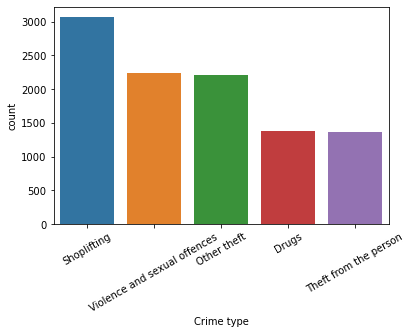

In [75]:
#Making count plot to see what types of crime are the most prevalent in Westminster
x = sns.countplot(x='Crime type', data=westminster_crime, order=pd.value_counts(westminster_crime['Crime type']).iloc[:5].index)
x.set_xticklabels(x.get_xticklabels(), rotation=30)

In [76]:
#Want to know the actual numbers for crime type in Westminster
westminster_crime['Crime type'].value_counts()

Shoplifting                     3068
Violence and sexual offences    2242
Other theft                     2208
Drugs                           1388
Theft from the person           1364
Public order                     911
Robbery                          486
Criminal damage and arson        369
Burglary                         336
Vehicle crime                    237
Other crime                      173
Bicycle theft                    127
Possession of weapons            106
Name: Crime type, dtype: int64

Although we could do a little more work and shorten down the length of the crime type values, from the graph above we are able to get an idea about what type of crime is going on in the Westminster area. Shoplifting accounts for about 3068 of the 13015 crime incidents in Westminster or about 24% of the crime in the area. How does Westminster's shoplifting compare to the overall average for shoplifting?

[Text(0, 0, 'Shoplifting'),
 Text(1, 0, 'Other theft'),
 Text(2, 0, 'Violence and sexual offences'),
 Text(3, 0, 'Drugs'),
 Text(4, 0, 'Public order')]

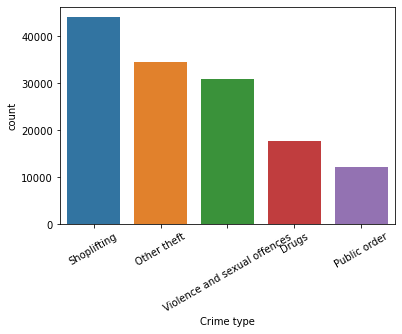

In [77]:
#Count plot for overall crime types in London
a = sns.countplot(x='Crime type', data=street_outcome, order=pd.value_counts(street_outcome['Crime type']).iloc[:5].index)
a.set_xticklabels(a.get_xticklabels(), rotation=30)

In [78]:
#Specific numbers for all of London crime types
street_outcome['Crime type'].value_counts()

Shoplifting                     44097
Other theft                     34596
Violence and sexual offences    30899
Drugs                           17723
Public order                    12126
Theft from the person            8367
Criminal damage and arson        7933
Vehicle crime                    4763
Burglary                         4503
Robbery                          3449
Other crime                      2906
Bicycle theft                    2121
Possession of weapons            1922
Name: Crime type, dtype: int64

From the information from the street_outcome dataset it can be seen that there are a total of 44,097 shoplifting incidents and there were a total of 175,405 total incidents leading to about 25% of the crimes being committed in all of London, which means that there is no spike or dip with the shoplifting data. 

In [79]:
#Making new dataframe for use looking at top 5 crime types in Westminster
crime_type_for_filter = ['Shoplifting', 'Violence and sexual offences', 'Other theft', 'Drugs', 'Theft from the person']
westminster_crime_filter = westminster_crime[westminster_crime['Crime type'].isin(crime_type_for_filter)]

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

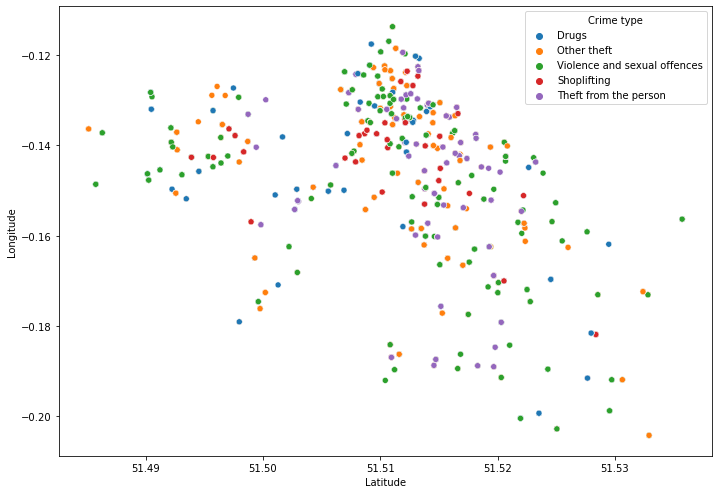

In [80]:
#Look at the general area where crime took place
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
sns.scatterplot(x='Latitude', y='Longitude', hue='Crime type', data=westminster_crime_filter, ax=ax)

Although every crime seems to be centralized at 51.51 latitude, -.14 longitude there does not seem to be any trends that are going on. Shoplifting seems to occur more often in the north part of Westminster.

In [81]:
westminster_crime['Last outcome category'].value_counts()

Investigation complete; no suspect identified    6496
Offender given a caution                         1224
Offender sent to prison                           836
Court result unavailable                          788
Offender given a drugs possession warning         571
Status update unavailable                         528
Offender fined                                    489
Offender given penalty notice                     433
Awaiting court outcome                            355
Offender given community sentence                 320
Offender given suspended prison sentence          246
Offender given conditional discharge              215
Defendant found not guilty                        174
Under investigation                               136
Court case unable to proceed                       87
Offender otherwise dealt with                      42
Local resolution                                   27
Offender deprived of property                      23
Offender ordered to pay comp

For most of the crime in Westminster an investigation was complete and no suspects were found. More specifically in this dataset 50% of the investigations were concluded with no suspect found. Knowing that shoplifting was the highest crime type in the area it would be really interesting to see how the crime was reported. How many of the shoplifting incidents resulted in no suspect being found?

In [82]:
#Make subset of the data only involving shoplifting incidents in Westminster
shoplift_for_filter = ['Shoplifting']
westminster_shoplift_filter = westminster_crime_filter[westminster_crime_filter['Crime type'].isin(shoplift_for_filter)]

In [83]:
#Getting overall count of outcomes for shoplifting in Westminster
westminster_shoplift_filter['Last outcome category'].value_counts()

Investigation complete; no suspect identified    686
Offender given a caution                         556
Offender given penalty notice                    363
Offender sent to prison                          327
Court result unavailable                         281
Offender fined                                   184
Offender given community sentence                147
Offender given conditional discharge             122
Awaiting court outcome                           118
Offender given suspended prison sentence         116
Status update unavailable                         62
Defendant found not guilty                        33
Under investigation                               21
Local resolution                                  17
Offender otherwise dealt with                     15
Court case unable to proceed                      12
Offender ordered to pay compensation               7
Defendant sent to Crown Court                      1
Name: Last outcome category, dtype: int64

From the above information shoplifting in Westminster only accounts for 11% of the no suspect identified outcome. What crime type has the most no suspects identified?

In [84]:
#Make subset of data only looking at incidents where no suspect was identified
no_suspect_for_filter = ['Investigation complete; no suspect identified']
westminster_no_suspect_filter = westminster_crime[westminster_crime['Last outcome category'].isin(no_suspect_for_filter)]

In [85]:
#Get sum values of all crime type where no suspect was found
westminster_no_suspect_filter['Crime type'].value_counts()

Other theft                     1903
Theft from the person           1167
Violence and sexual offences    1079
Shoplifting                      686
Robbery                          396
Public order                     378
Vehicle crime                    208
Burglary                         203
Criminal damage and arson        164
Drugs                            152
Bicycle theft                    120
Other crime                       34
Possession of weapons              6
Name: Crime type, dtype: int64

Other theft is a pretty overarching category but it makes up for 29% of crime that no suspect was identified in. Looking at the other crime types a lot of the top crime types where no suspect was found had to do with stealing/theft of some degree. The one that stands out is Violence and sexual offences being the third highest crime type in the area where no suspect was identified. 

## Demographics of Suspects and Final Analysis

In [86]:
#Useful dataset for looking at Westminster crime demographics
westminster_demo = pd.merge(westminster_crime, new_search1, on=['Longitude', 'Latitude'])
westminster_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97995 entries, 0 to 97994
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crime ID                      97995 non-null  object 
 1   Month                         97995 non-null  object 
 2   Reported by                   97995 non-null  object 
 3   Falls within                  97995 non-null  object 
 4   Longitude                     97995 non-null  float64
 5   Latitude                      97995 non-null  float64
 6   Location                      97995 non-null  object 
 7   LSOA code                     97995 non-null  object 
 8   LSOA name                     97995 non-null  object 
 9   Crime type                    97995 non-null  object 
 10  Last outcome category         97995 non-null  object 
 11  Year_x                        97995 non-null  object 
 12  month_x                       97995 non-null  object 
 13  L

Knowing that we are only dealing with Westminster data in the westminster_crime dataset matching westminster_crime and our new_search1 dataset on Latitude and Longitude is an easy and effective way to narrow down our demographic dataset to just Westminster.

In [87]:
#Start analysis of Gender
westminster_demo.Gender.value_counts()

Male      87608
Female    10100
Other       287
Name: Gender, dtype: int64

The first column to look at is the Gender column. For Westminster crime 89% of it was committed by males. 

In [88]:
#Analysis of Officer-defined ethinicty 
westminster_demo['Officer-defined ethnicity'].value_counts()

White    47376
Black    37315
Asian     6904
Other     6400
Name: Officer-defined ethnicity, dtype: int64

We also now know that 50% of the crime in Westminster was done by a White citizen.

In [89]:
#Make subset of data only looking at incidents where no suspect was identified
white_for_filter = ['White']
westminster_white_filter = westminster_demo[westminster_demo['Officer-defined ethnicity'].isin(white_for_filter)]
westminster_white_filter['Crime type'].value_counts()

Shoplifting                     10854
Violence and sexual offences     9559
Other theft                      7556
Theft from the person            6412
Drugs                            4331
Public order                     3467
Robbery                          2391
Burglary                          829
Criminal damage and arson         707
Possession of weapons             421
Other crime                       342
Vehicle crime                     293
Bicycle theft                     214
Name: Crime type, dtype: int64

We also now know that for the White population the crimes that were committed fall in line with the crime types that were the most prevalent in the area.

In [90]:
#Count of Age demographics for Westminster crime
westminster_demo['Age range'].value_counts()

18-24      33694
over 34    28239
25-34      28055
10-17       8007
Name: Age range, dtype: int64

A surprising part of the data is seeing that the second highest amount of crime is committed by people at least over the age of 34.

In [91]:
#Check and see how our age demographic compares with shoplifting
westminster_shoplift_demo = westminster_demo[westminster_demo['Crime type'].isin(shoplift_for_filter)]
westminster_shoplift_demo['Age range'].value_counts()

18-24      5643
over 34    5272
25-34      4682
10-17      2518
Name: Age range, dtype: int64

Our age range looks the same for shoplifting as it did for our overall age range for crime.

<AxesSubplot:xlabel='Year_x', ylabel='count'>

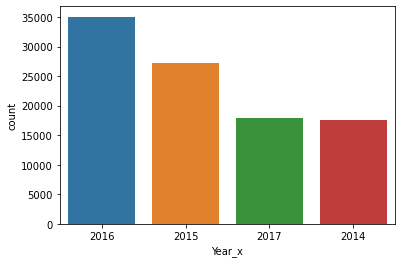

In [92]:
#Countplot of Year
sns.countplot(x="Year_x", data=westminster_demo, order = westminster_demo['Year_x'].value_counts().index)

Looking at the data that comes from Westminster crime it looks like 2016 has the highest year of crime and there are no growing trends or declining trends of crime in the area as 2014 and 2017 both have the lowest amount of crime for all the years.

<AxesSubplot:xlabel='month_x', ylabel='count'>

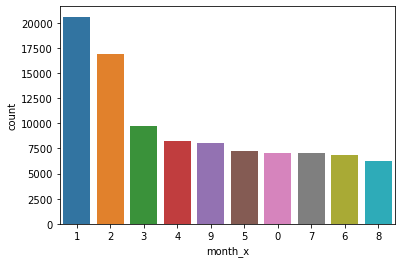

In [93]:
#Look at month crimes were committed in Westminster
sns.countplot(x="month_x", data=westminster_demo, order = westminster_demo['month_x'].value_counts().index)

From this count we can see that the earlier part of the year had higher amounts of crime than any other part of the year.

This dataset has a lot of useful information and the findings of Westminster have been interesting. There are endless amounts of trends that could be researched and this dataset has been useful for practicing data cleaning techniques and thorough in-depth analysis research.

**Resources**

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
https://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot
https://datatofish.com/count-duplicates-pandas/
https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
https://stackoverflow.com/questions/62025957/filter-data-and-modifying-labels-in-seaborn-boxplot-graphs
https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot